# 作业2-年收入判断

## 项目描述
二元分类是机器学习中最基础的问题之一，在这份教学中，你将学会如何实作一个线性二元分类器，来根据人们的个人资料，判断其年收入是否高于 50,000 美元。我们将以两种方法: logistic regression 与 generative model，来达成以上目的，你可以尝试了解、分析两者的设计理念及差别。
实现二分类任务：
* 个人收入是否超过50000元？

## 数据集介绍
这个资料集是由UCI Machine Learning Repository 的Census-Income (KDD) Data Set 经过一些处理而得来。为了方便训练，我们移除了一些不必要的资讯，并且稍微平衡了正负两种标记的比例。事实上在训练过程中，只有 X_train、Y_train 和 X_test 这三个经过处理的档案会被使用到，train.csv 和 test.csv 这两个原始资料档则可以提供你一些额外的资讯。
* 已经去除不必要的属性。
* 已经平衡正标和负标数据之间的比例。

**特征格式**
1. train.csv，test_no_label.csv。
* 基于文本的原始数据
* 去掉不必要的属性，平衡正负比例。
2. X_train, Y_train, X_test(测试)
* train.csv中的离散特征=>在X_train中onehot编码(学历、状态...)
* train.csv中的连续特征 => 在X_train中保持不变(年龄、资本损失...)。
* X_train, X_test : 每一行包含一个510-dim的特征，代表一个样本。
* Y_train: label = 0 表示 "<=50K" 、 label = 1 表示 " >50K " 。

## 项目要求
1. 请动手编写 gradient descent 实现 logistic regression
1. 请动手实现概率生成模型。
1. 单个代码块运行时长应低于五分钟。
1. 禁止使用任何开源的代码(例如，你在GitHub上找到的决策树的实现)。

## 数据准备
项目数据保存在：work/data/ 目录下。

## 环境配置/安装
无

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('work/data/train.csv', header=None, encoding='big5')
print(df.shape)
df.head()

(54257, 42)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,1,3,4,6,17,18,19,30,36,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,id,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,y
1,0,33,Private,34,26,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,...,China,China,Taiwan,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95,50000+.
2,1,63,Private,7,22,Some college but no degree,0,Not in universe,Never married,Manufacturing-durable goods,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
3,2,71,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
4,3,43,Local government,43,10,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [ ]:
df = pd.read_csv('work/data/X_train', header=None, encoding='big5')
print(df.shape)
df.head()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,

(54257, 511)


,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
0,id,age,Private,Self-employed-incorporated,State government,Self-employed-not incorporated,Not in universe,Without pay,Federal government,Never worked,...,1,Not in universe,Yes,No,2,0,1,weeks worked in year,94,95
1,0,33,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,52,0,1
2,1,63,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,52,0,1
3,2,71,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,3,43,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,52,0,1


## Preparing Data
对属性进行正则化，处理过后划分为训练集和验证集

In [ ]:
np.random.seed(0)
X_train_fpath = 'work/data/X_train'
Y_train_fpath = 'work/data/Y_train'
X_test_fpath = 'work/data/X_test'
output_fpath = 'work/output_{}.csv'

# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)

# 规范化
def _normalize(X, train = True, specified_column = None, X_mean = None, X_std = None):
    # This function normalizes specific columns of X.
    # The mean and standard variance of training data will be reused when processing testing data.
    #
    # Arguments:
    #     X: data to be processed
    #     train: 'True' when processing training data, 'False' for testing data
    #     specific_column: indexes of the columns that will be normalized. If 'None', all columns
    #         will be normalized.
    #     X_mean: mean value of training data, used when train = 'False'
    #     X_std: standard deviation of training data, used when train = 'False'
    # Outputs:
    #     X: normalized data
    #     X_mean: computed mean value of training data
    #     X_std: computed standard deviation of training data

    if specified_column == None:
        specified_column = np.arange(X.shape[1])
    if train:
        X_mean = np.mean(X[:, specified_column] ,0).reshape(1, -1)
        X_std  = np.std(X[:, specified_column], 0).reshape(1, -1)

    X[:,specified_column] = (X[:, specified_column] - X_mean) / (X_std + 1e-8)
     
    return X, X_mean, X_std

def _train_dev_split(X, Y, dev_ratio = 0.25):
    # This function spilts data into training set and development set.
    train_size = int(len(X) * (1 - dev_ratio))
    return X[:train_size], Y[:train_size], X[train_size:], Y[train_size:]

# Normalize training and testing data
X_train, X_mean, X_std = _normalize(X_train, train = True)
X_test, _, _ = _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)
    
# Split data into training set and development set
dev_ratio = 0.1
# 9:1
X_train, Y_train, X_eval, Y_eval = _train_dev_split(X_train, Y_train, dev_ratio = dev_ratio)

train_size = X_train.shape[0]
eval_size = X_eval.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]

print('Size of training set: {}'.format(X_train.shape[0]))
print('Size of eval set: {}'.format(X_eval.shape[0]))
print('Size of testing set: {}'.format(X_test.shape[0]))
print('Dimension of data: {}'.format(data_dim))

Size of training set: 48830
Size of eval set: 5426
Size of testing set: 27622
Dimension of data: 510


## Some Useful Functions

In [ ]:
def _shuffle(X, Y):
    # This function shuffles two equal-length list/array, X and Y, together.
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    return (X[randomize], Y[randomize])

def _sigmoid(z):
    # Sigmoid function can be used to calculate probability.
    # To avoid overflow, minimum/maximum output value is set.
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))

def _f(X, w, b):
    # This is the logistic regression function, parameterized by w and b
    #
    # Arguements:
    #     X: input data, shape = [batch_size, data_dimension]
    #     w: weight vector, shape = [data_dimension, ]
    #     b: bias, scalar
    # Output:
    #     predicted probability of each row of X being positively labeled, shape = [batch_size, ]
    return _sigmoid(np.matmul(X, w) + b)

def _predict(X, w, b):
    # This function returns a truth value prediction for each row of X 
    # by rounding the result of logistic regression function.
    return np.round(_f(X, w, b)).astype(np.int)
    
def _accuracy(Y_pred, Y_label):
    # This function calculates prediction accuracy
    acc = 1 - np.mean(np.abs(Y_pred - Y_label))
    return acc

## Functions about gradient and loss

In [ ]:
# 交叉熵损失 if 0-1损失 第二项为0
def _cross_entropy_loss(y_pred, Y_label):
    # This function computes the cross entropy.
    #
    # Arguements:
    #     y_pred: probabilistic predictions, float vector
    #     Y_label: ground truth labels, bool vector
    # Output:
    #     cross entropy, scalar
    cross_entropy = -np.dot(Y_label, np.log(y_pred)) - np.dot((1 - Y_label), np.log(1 - y_pred))
    return cross_entropy

# 
def _gradient(X, Y_label, w, b):
    # This function computes the gradient of cross entropy loss with respect to weight w and bias b.
    y_pred = _f(X, w, b)
    pred_error = Y_label - y_pred
    w_grad = -np.sum(pred_error * X.T, 1)
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

## Trainning
`Mini-batch`

In [21]:
# Zero initialization for weights ans bias
w = np.zeros((data_dim, )) 
b = np.zeros((1,))

# Some parameters for training    
EPOCH = 10
batch_size = 128
learning_rate = 0.2

# Keep the loss and accuracy at every iteration for plotting
train_loss = []
eval_loss = []
train_acc = []
eval_acc = []

# Calcuate the number of parameter updates
adagrad_step = 1
batch_step = 0
# Iterative training
for epoch in range(EPOCH):
    # Random shuffle at the begging of each epoch
    X_train, Y_train = _shuffle(X_train, Y_train)
        
    # Mini-batch training
    step = 0
    steps = int(np.floor(train_size / batch_size))
    for idx in range(steps):  # floor(48830/128)=382
        X = X_train[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train[idx*batch_size:(idx+1)*batch_size]

        # Compute the gradient
        w_grad, b_grad = _gradient(X, Y, w, b)
            
        # gradient descent update
        # learning rate decay with time
        w = w - learning_rate/np.sqrt(adagrad_step) * w_grad
        b = b - learning_rate/np.sqrt(adagrad_step) * b_grad
        
        step += 1
        adagrad_step += 1

        # Compute loss and accuracy of training set and development set
        y_train_pred = _f(X_train, w, b)
        Y_train_pred = np.round(y_train_pred)
        y_eval_pred = _f(X_eval, w, b)
        Y_eval_pred = np.round(y_eval_pred)

        acc_train = _accuracy(Y_train_pred, Y_train)
        loss_train = _cross_entropy_loss(y_train_pred, Y_train) / train_size
        acc_eval = _accuracy(Y_eval_pred, Y_eval)
        loss_eval = _cross_entropy_loss(y_eval_pred, Y_eval) / eval_size

        if step % 50 == 0 or step == steps:
            print(f'Epoch {epoch}/{EPOCH}, step {step}/{steps} : train_loss = {loss_train}, train_acc = {acc_train}, eval_loss = {loss_eval}, eval_acc = {acc_eval}')

        train_acc.append(acc_train)
        train_loss.append(loss_train)
        eval_acc.append(acc_eval)
        eval_loss.append(loss_eval)

print('Training loss: {}'.format(train_loss[-1]))
print('Eval loss: {}'.format(eval_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Eval accuracy: {}'.format(eval_acc[-1]))

Epoch 0/10, step 50/381 : train_loss = 1.347386236965906, train_acc = 0.8488224452181037, eval_loss = 1.400598892932686, eval_acc = 0.8518245484703281


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Epoch 0/10, step 100/381 : train_loss = 0.9152016432029676, train_acc = 0.8617857874257628, eval_loss = 0.965991675211801, eval_acc = 0.8558791006266127
Epoch 0/10, step 150/381 : train_loss = 0.7852583061703493, train_acc = 0.8539627278312513, eval_loss = 0.8467023409488244, eval_acc = 0.8497972723921858
Epoch 0/10, step 200/381 : train_loss = 0.6855500080014343, train_acc = 0.8627687896784764, eval_loss = 0.7420444348505428, eval_acc = 0.8510873571691854
Epoch 0/10, step 250/381 : train_loss = 0.6626799916718044, train_acc = 0.8518533688306369, eval_loss = 0.6843539759344478, eval_acc = 0.8462956137117582
Epoch 0/10, step 300/381 : train_loss = 0.6722368835334585, train_acc = 0.850419823878763, eval_loss = 0.7212556694191992, eval_acc = 0.8431625506819019
Epoch 0/10, step 350/381 : train_loss = 0.5415013375184299, train_acc = 0.8645095228343231, eval_loss = 0.5956548816527707, eval_acc = 0.8534832288978991
Epoch 0/10, step 380/381 : train_loss = 0.5476793641705842, train_acc = 0.8615

## Plotting Loss and accuracy curve

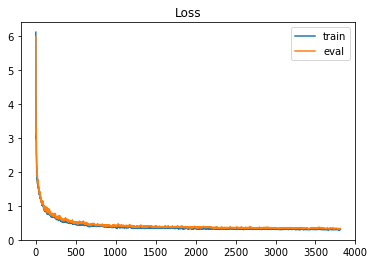

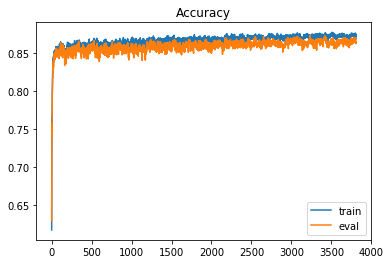

In [32]:
# Loss curve
# plt.figure(figsize=(16, 8))
plt.plot(train_loss)
plt.plot(eval_loss)
plt.title('Loss')
plt.legend(['train', 'eval'])
plt.savefig('loss.png')
plt.show()

# Accuracy curve
# plt.figure(figsize=(16, 8))
plt.plot(train_acc)
plt.plot(eval_acc)
plt.title('Accuracy')
plt.legend(['train', 'eval'])
plt.savefig('acc.png')
plt.show()

## Predicting testing labels
输出到`output_logistic.csv`。

In [33]:
# Predict testing labels
predictions = _predict(X_test, w, b)
with open(output_fpath.format('logistic'), 'w') as f:
    f.write('id,label\n')
    for i, label in  enumerate(predictions):
        f.write('{},{}\n'.format(i, label))

# Print out the most significant weights
ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().strip('\n').split(',')
features = np.array(content)
for i in ind[0:10]:
    print(features[i], w[i])

 Local government -5.370818305378536
 Other Rel 18+ ever marr RP of subfamily -4.303398837549008
num persons worked for employer 4.177335768723998
 Neither parent present -3.8146477310419447
dividends from stocks -3.6462348599573593
 2 -3.492485219117511
 High school graduate -3.486094628398619
 Child under 18 ever married -3.405443955741911
 Grandchild 18+ never marr RP of subfamily -3.331278619262018
 Philippines -3.304985181079396


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


# Porbabilistic generative model

## Preparing Data 

In [34]:
# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)

# Normalize training and testing data
X_train, X_mean, X_std = _normalize(X_train, train = True)
X_test, _, _= _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)

## Mean and Covariance

In [35]:
# Compute in-class mean
X_train_0 = np.array([x for x, y in zip(X_train, Y_train) if y == 0])
X_train_1 = np.array([x for x, y in zip(X_train, Y_train) if y == 1])

mean_0 = np.mean(X_train_0, axis = 0)
mean_1 = np.mean(X_train_1, axis = 0)  

# Compute in-class covariance
cov_0 = np.zeros((data_dim, data_dim))
cov_1 = np.zeros((data_dim, data_dim))

for x in X_train_0:
    cov_0 += np.dot(np.transpose([x - mean_0]), [x - mean_0]) / X_train_0.shape[0]
for x in X_train_1:
    cov_1 += np.dot(np.transpose([x - mean_1]), [x - mean_1]) / X_train_1.shape[0]

# Shared covariance is taken as a weighted average of individual in-class covariance.
cov = (cov_0 * X_train_0.shape[0] + cov_1 * X_train_1.shape[0]) / (X_train_0.shape[0] + X_train_1.shape[0])

## Computing weights and bias

In [36]:
# Compute inverse of covariance matrix.
# Since covariance matrix may be nearly singular, np.linalg.inv() may give a large numerical error.
# Via SVD decomposition, one can get matrix inverse efficiently and accurately.
u, s, v = np.linalg.svd(cov, full_matrices=False)
inv = np.matmul(v.T * 1 / s, u.T)

# Directly compute weights and bias
w = np.dot(inv, mean_0 - mean_1)
b =  (-0.5) * np.dot(mean_0, np.dot(inv, mean_0)) + 0.5 * np.dot(mean_1, np.dot(inv, mean_1))\
    + np.log(float(X_train_0.shape[0]) / X_train_1.shape[0]) 

# Compute accuracy on training set
Y_train_pred = 1 - _predict(X_train, w, b)
print('Training accuracy: {}'.format(_accuracy(Y_train_pred, Y_train)))

Training accuracy: 0.8700420230020642


## Predicting testing labels
Predictions are saved to `output_generative.csv`.

In [37]:
# Predict testing labels
predictions = 1 - _predict(X_test, w, b)
with open(output_fpath.format('generative'), 'w') as f:
    f.write('id,label\n')
    for i, label in  enumerate(predictions):
        f.write('{},{}\n'.format(i, label))

# Print out the most significant weights
ind = np.argsort(np.abs(w))[::-1]
with open(X_test_fpath) as f:
    content = f.readline().strip('\n').split(',')
features = np.array(content)
for i in ind[0:10]:
    print(features[i], w[i])

 Retail trade 7.166015625
 34 -5.45166015625
 37 -5.06494140625
 Other service -4.76123046875
 29 4.462890625
 Forestry and fisheries -4.35546875
 Public administration -3.927734375
 28 3.796875
 40 -3.7880859375
 Abroad 3.59765625
